In [112]:
import gcSampler
import matplotlib.pyplot as plt
import densityFG 
import densityGC
import numpy as np
import scipy.integrate as integrate
import triangle
%matplotlib inline

reload(gcSampler)
reload(densityFG)
reload(densityGC)


<module 'densityGC' from 'densityGC.pyc'>

In [113]:
f_gc = 0.5
n_source = 200.
n_gc = np.round(f_gc * n_source)
n_fg = np.round((1.-f_gc) * n_source)
r_s = 10.0
q = 0.7
pa = np.pi/8.
truths = np.array([f_gc,r_s,q,pa])
sampler = gcSampler.gcSampler(8,mock=True,n_gc=n_gc,n_fg=n_fg,r_s=r_s,q=q,pa=pa,mc_scale=1.8,\
                              radial_profile='exponential',ellipticity=True)

In [120]:
sampler.runSampler(5000,burn=True,burn_steps=0)
print sampler.sampler.acceptance_fraction

f_gc median, 2.5%, and 97.5%: 0.495145521155    0.417695992057    0.572769362823
r_s median, 2.5%, and 97.5%: 9.42706962599    5.4133386989    13.3756371041
q median, 2.5%, and 97.5%: 0.693848819018    0.540787680669    0.991508511725
pa median, 2.5%, and 97.5%: 0.438941800436    -0.0900607365607    0.769883524538
Number of False Negatives:  1
Number of False Positives:  7
[ 0.641   0.6306  0.649   0.6369  0.6298  0.6388  0.6509  0.6431]


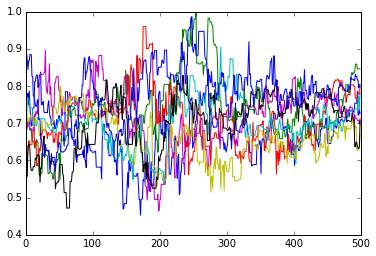

In [128]:
for i in range(8):
    plt.plot(sampler.sampler.chain[i,9500:,2])
    

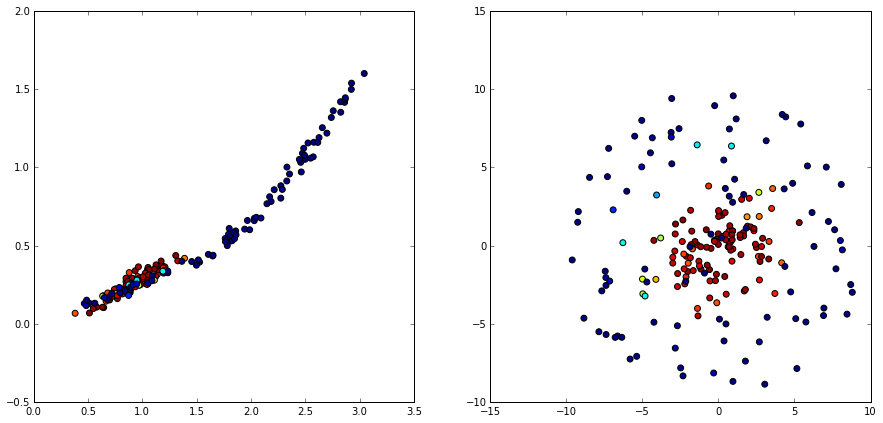

In [130]:
gi = sampler.data[0]
ri = sampler.data[1]

x = sampler.data[2]
y = sampler.data[3]
gc = densityGC.densityGC()
fg = densityFG.densityFG()

fix,ax = plt.subplots(figsize=(15,7),ncols=2)

#ax.set_xlim([-10,10])
#ax.set_ylim([-10,10])
#gcLike = gc.lnLike(sampler.data)
#fgLike = fg.lnLike(sampler.data)

gcs = sampler.p_gc > 0.5


ax[0].scatter(gi,ri,c=sampler.p_gc,s=35)
ax[1].scatter(x,y,c=sampler.p_gc,s=35)

Quantiles:
[(0.16, 0.4548218215881617), (0.5, 0.4951455211553506), (0.84, 0.53349788954076183)]
Quantiles:
[(0.16, 7.7817418731015522), (0.5, 9.4270696259940898), (0.84, 11.319447508445897)]
Quantiles:
[(0.16, 0.61157446983271702), (0.5, 0.69384881901811823), (0.84, 0.80261243647091907)]
Quantiles:
[(0.16, 0.26602534325519656), (0.5, 0.43894180043644682), (0.84, 0.58917728986773754)]


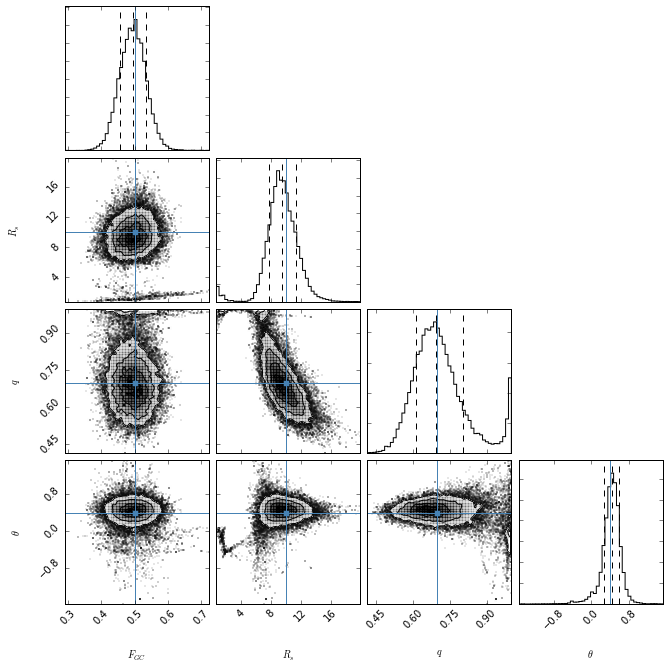

In [121]:
fig = triangle.corner(sampler.chain,truths=truths,labels=[r'$F_{GC}$',r'$R_s$',r'$q$',r'$\theta$'],\
                quantiles=[0.16, 0.5, 0.84])

In [99]:
sampler.chain.shape

(32000, 4)

(array([ 85.,   3.,   0.,   1.,   0.,   1.,   0.,   4.,   0.,   0.,   0.,
          3.,   1.,   0.,   2.,   2.,   6.,   6.,  25.,  61.]),
 array([  1.75593402e-107,   4.99936874e-002,   9.99873748e-002,
          1.49981062e-001,   1.99974750e-001,   2.49968437e-001,
          2.99962124e-001,   3.49955812e-001,   3.99949499e-001,
          4.49943187e-001,   4.99936874e-001,   5.49930561e-001,
          5.99924249e-001,   6.49917936e-001,   6.99911624e-001,
          7.49905311e-001,   7.99898998e-001,   8.49892686e-001,
          8.99886373e-001,   9.49880061e-001,   9.99873748e-001]),
 <a list of 20 Patch objects>)

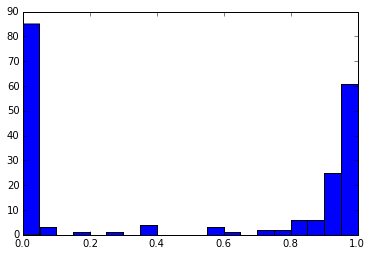

In [131]:
plt.hist(sampler.p_gc,bins=20)

<matplotlib.colorbar.Colorbar instance at 0x10f819560>

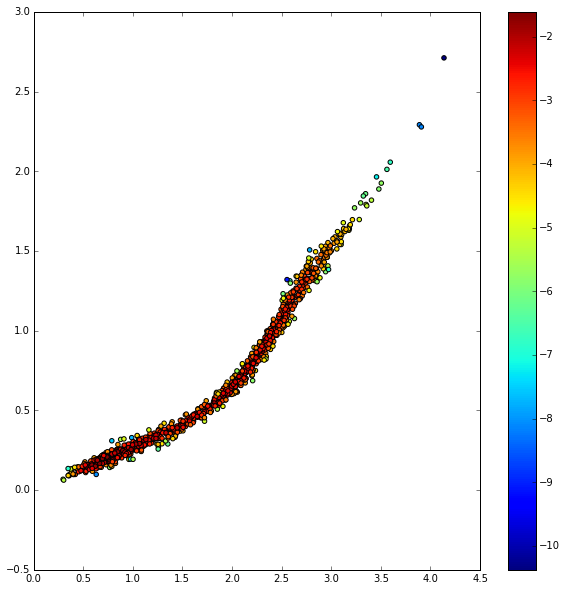

In [195]:
fix,ax = plt.subplots(figsize=(10,10))
plt.scatter(mock_fg[0],mock_fg[1],c=like_fg)
plt.colorbar()

In [207]:
#normalization:
def low(x):
    return -20

def high(x):
    return 20
integrate.dblquad(fg.LikeColor,2.0100001,2.03,low,high)

(5.106594545590503e-06, 8.378108331660252e-09)

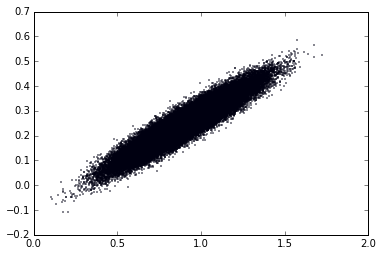

In [121]:
new_mock = fg.genMock(n=100000)
plt.scatter(new_mock[0],new_mock[1],s=0.3)

In [93]:
like = fg.lnLike(new_mock)

In [514]:
100000 / np.sum(fg.exp(like))

AttributeError: 'densityFG' object has no attribute 'exp'

In [219]:
print fg.star_weights[90] 
print fg.gi_color[90] 
print fg.LikeColor(2.02,0.66)

0.00756917212887
2.02
[ 0.66] [ 0.03] [ 2.02]
[ 0.10065543]


In [513]:
np.log(50)

3.912023005428146

Broadly speaking, I study extragalactic globular cluster systems, populations of bright star clusters which orbit in the outskirts of galaxies. These globular clusters are old, extremely dense collections of stars which form in the earliest stages of galaxy formation and effectively witness the various stages of galaxy evolution. Characterizing the spatial, kinematical, and compositional distributions of globular clusters as a function of galaxy types and sizes allows us to understand the assembly of galaxies through cosmic time in a way that would be infeasible from simply studying the galaxies themselves. 